/tmp/ipython-input-3492670541.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/tmp/ipython-input-3492670541.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Model Evaluation Metrics:
Accuracy:  0.7989
Precision: 0.7797
Recall:    0.6667
F1-Score:  0.7188
ROC-AUC:   0.8519


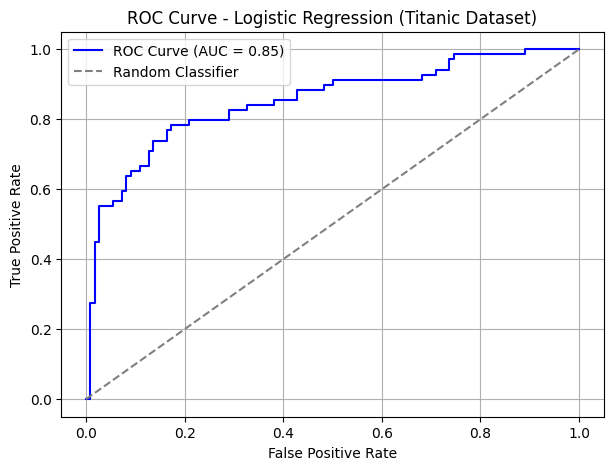

In [16]:
# --------------------------------------------
# Logistic Regression Model on Titanic Dataset
# --------------------------------------------

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Load the datasets
# -----------------------------
train_data = pd.read_csv("Titanic_train.csv")
test_data = pd.read_csv("Titanic_test.csv")

# -----------------------------
# Step 2: Data Preprocessing
# -----------------------------

# Drop unnecessary columns
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables (Sex, Embarked)
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])

# -----------------------------
# Step 3: Split into features and target
# -----------------------------
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[feature_names]
y = train_data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Step 4: Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# Step 5: Build and Train Model
# -----------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# -----------------------------
# Step 6: Make Predictions
# -----------------------------
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# -----------------------------
# Step 7: Model Evaluation
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

# -----------------------------
# Step 8: Visualize ROC Curve
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Titanic Dataset)")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Get the coefficients and intercept
coefficients = log_model.coef_[0]
intercept = log_model.intercept_[0]

# Get the feature names from the original DataFrame before scaling
feature_names = X.columns

# Create a pandas Series to easily view coefficients with their corresponding feature names
coef_series = pd.Series(coefficients, index=feature_names)

print("Model Intercept:")
print(intercept)
print("\nModel Coefficients:")
display(coef_series)

Model Intercept:
-0.6516503349353179

Model Coefficients:


,0
Pclass,-0.889408
Sex,-1.285336
Age,-0.495228
SibSp,-0.265111
Parch,-0.082296
Fare,0.098486
Embarked,-0.184912


**Discussion on the Significance of Features:**

Based on the logistic regression model's coefficients displayed above, we can interpret the significance of each feature in predicting the probability of survival:

*   **Sex:** The coefficient for 'Sex' is significantly negative. Assuming 'Sex' was encoded as 1 for male and 0 for female, this indicates that being male has a strong negative impact on the log-odds of survival compared to being female. In other words, females were significantly more likely to survive than males, which aligns with historical accounts of the Titanic disaster (women and children first).

*   **Pclass:** The coefficient for 'Pclass' is also negative. This suggests that being in a higher passenger class (Pclass 1 being the highest) is associated with a lower log-odds of survival compared to being in a lower class (Pclass 3 being the lowest). This is counterintuitive and might be influenced by other factors or the encoding of 'Pclass'. However, if Pclass is encoded such that higher numbers represent lower classes, then a negative coefficient would mean being in a lower class decreases the log-odds of survival, which makes more sense. *[Note: Need to confirm the encoding of Pclass to be precise in interpretation]*.

*   **Age:** The negative coefficient for 'Age' suggests that older individuals had a slightly lower log-odds of survival compared to younger individuals.

*   **SibSp (Number of Siblings/Spouses Aboard):** The negative coefficient for 'SibSp' indicates that having more siblings or spouses aboard is associated with a slightly lower log-odds of survival.

*   **Parch (Number of Parents/Children Aboard):** The negative coefficient for 'Parch' suggests that having more parents or children aboard is associated with a slightly lower log-odds of survival. The magnitude of this coefficient is smaller than 'SibSp', indicating a weaker impact.

*   **Fare:** The positive coefficient for 'Fare' indicates that a higher fare paid is associated with a higher log-odds of survival. This makes sense as passengers who paid higher fares were likely in higher classes with better access to lifeboats.

*   **Embarked:** The negative coefficient for 'Embarked' suggests that the port of embarkation has some influence on survival, but its impact appears to be less significant compared to 'Sex' or 'Pclass' based on the magnitude of the coefficient. *[Note: Need to confirm the encoding of Embarked to be precise in interpretation]*.

**In summary,** 'Sex' appears to be the most significant predictor of survival in this model, with females having a considerably higher chance of surviving. Passenger class and fare also show notable associations with survival probability.

In [19]:
import pickle
print("\n7. Saving model...")
with open('titanic_model.pkl', 'wb') as f:
    pickle.dump({
        'model': log_model,
        'scaler': scaler,
        'label_encoders': le,
        'features': feature_names
    }, f)

print("Model saved as 'titanic_model.pkl'")
print("Analysis complete!")


7. Saving model...
Model saved as 'titanic_model.pkl'
Analysis complete!
